In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

acapulco mx
codrington ag
port alfred za
barentsburg sj
berlevag no
kungurtug ru
nikolskoye ru
puerto ayora ec
bengkulu id
hermanus za
albany au
taolanaro mg
atuona pf
albany au
saskylakh ru
curup id
touros br
tiksi ru
severo-kurilsk ru
cockburn town tc
palmerston north nz
okhotsk ru
mataura pf
toora-khem ru
albany au
new norfolk au
port elizabeth za
arraial do cabo br
mahebourg mu
cabo san lucas mx
cap malheureux mu
hermanus za
rikitea pf
kaitangata nz
albany au
ushuaia ar
grindavik is
alofi nu
nantucket us
saldanha za
lompoc us
severo-kurilsk ru
nome us
bambous virieux mu
balsas br
piet retief za
saskylakh ru
punta arenas cl
kaberamaido ug
kapaa us
asyut eg
souillac mu
mahebourg mu
zhigansk ru
nuuk gl
mataura pf
rikitea pf
qaanaaq gl
rikitea pf
rikitea pf
santiago del estero ar
bluff nz
khatanga ru
kangaatsiaq gl
new norfolk au
hoi an vn
ushuaia ar
taolanaro mg
hobart au
luderitz na
albany au
pisco pe
kupang id
west bay ky
mataura pf
san patricio mx
barentsburg sj
kavaratti in
barcel

cidreira br
albany au
tasiilaq gl
bethel us
vuktyl ru
tete mz
rikitea pf
ise jp
hithadhoo mv
butaritari ki
east london za
guerrero negro mx
vostok ru
kapaa us
severo-kurilsk ru
petropavlovsk-kamchatskiy ru
iqaluit ca
new norfolk au
wanning cn
souillac mu
saskylakh ru
ushuaia ar
yellamanchili in
port alfred za
oga jp
corn island ni
ribeira grande pt
nouadhibou mr
hobart au
ribeira grande pt
castro cl
manthani in
sarahan in
nikolskoye ru
tiznit ma
hithadhoo mv
menongue ao
atuona pf
eyl so
bonavista ca
cabo san lucas mx
bethel us
brae gb
gamba ga
port alfred za
bluff nz
vila franca do campo pt
saleaula ws
yulara au
westport nz
bluff nz
butaritari ki
rikitea pf
bredasdorp za
hilo us
bartica gy
dakar sn
amderma ru
ushuaia ar
rikitea pf
san cristobal ec
lebu cl
taolanaro mg
micheweni tz
yellowknife ca
kruisfontein za
port alfred za
qaanaaq gl
hilo us
tabou ci
saleaula ws
kapaa us
illoqqortoormiut gl
yazman pk
fort william gb
margate za
nanortalik gl
souillac mu
mataura pf
tasiilaq gl
meulabo

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c66c90587bd629e14b26342be609984f


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | berlevag
Processing Record 6 of Set 1 | kungurtug
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | curup
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | palmerston north
Processing Record 21 of Set 1 | okhotsk
Processin

Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | richards bay
Processing Record 42 of Set 4 | sangar
Processing Record 43 of Set 4 | beira
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | ulaangom
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | busselton
Processing Record 48 of Set 4 | porbandar
Processing Record 49 of Set 4 | southbridge
Processing Record 50 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 1 of Set 5 | santa cruz de tenerife
Processing Record 2 of Set 5 | plettenberg bay
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | jalu
Processing Record 7 of Set 5 | alice
Processing Record 8 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 9 of Set 5 | camacha
Processing Record 10 of Set 5 | la gra

Processing Record 23 of Set 8 | maralal
Processing Record 24 of Set 8 | auki
Processing Record 25 of Set 8 | eureka
Processing Record 26 of Set 8 | kardasova recice
Processing Record 27 of Set 8 | saratoga springs
Processing Record 28 of Set 8 | vanimo
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | jubayl
City not found. Skipping...
Processing Record 31 of Set 8 | lakes entrance
Processing Record 32 of Set 8 | nemuro
Processing Record 33 of Set 8 | bela
Processing Record 34 of Set 8 | paragominas
Processing Record 35 of Set 8 | kamenka
Processing Record 36 of Set 8 | rudbar
Processing Record 37 of Set 8 | nodeland
Processing Record 38 of Set 8 | hulan ergi
Processing Record 39 of Set 8 | chekhov
Processing Record 40 of Set 8 | rio gallegos
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | irbit
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | kjol

Processing Record 10 of Set 12 | urumqi
Processing Record 11 of Set 12 | tornio
Processing Record 12 of Set 12 | airai
Processing Record 13 of Set 12 | aklavik
Processing Record 14 of Set 12 | isiolo
Processing Record 15 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 16 of Set 12 | peace river
Processing Record 17 of Set 12 | basco
Processing Record 18 of Set 12 | kwinana
Processing Record 19 of Set 12 | payo
Processing Record 20 of Set 12 | belmonte
Processing Record 21 of Set 12 | longyearbyen
Processing Record 22 of Set 12 | ndende
Processing Record 23 of Set 12 | arman
Processing Record 24 of Set 12 | riohacha
Processing Record 25 of Set 12 | san jeronimo
Processing Record 26 of Set 12 | makubetsu
Processing Record 27 of Set 12 | neuquen
Processing Record 28 of Set 12 | lahat
Processing Record 29 of Set 12 | jijiang
Processing Record 30 of Set 12 | waddan
Processing Record 31 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 

In [11]:
# Print the city data to confirm sufficient count.
len(city_data)

559

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acapulco,16.86,-99.89,84.20,83,75,3.36,MX,2020-08-22 18:25:57
1,Codrington,-38.27,141.97,46.45,81,27,18.48,AU,2020-08-22 18:26:07
2,Port Alfred,-33.59,26.89,61.92,60,0,4.14,ZA,2020-08-22 18:30:56
3,Berlevag,70.86,29.09,61.23,75,84,20.04,NO,2020-08-22 18:30:57
4,Kungurtug,50.60,97.52,46.67,86,3,2.86,RU,2020-08-22 18:30:57
5,Nikolskoye,59.70,30.79,66.20,63,40,4.47,RU,2020-08-22 18:30:57
6,Puerto Ayora,-0.74,-90.35,71.60,68,40,25.28,EC,2020-08-22 18:30:58
7,Bengkulu,-3.80,102.27,76.26,89,90,3.31,ID,2020-08-22 18:30:58
8,Hermanus,-34.42,19.23,57.99,88,0,1.99,ZA,2020-08-22 18:30:58
9,Albany,42.60,-73.97,84.99,52,22,8.77,US,2020-08-22 18:30:58


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acapulco,MX,2020-08-22 18:25:57,16.86,-99.89,84.20,83,75,3.36
1,Codrington,AU,2020-08-22 18:26:07,-38.27,141.97,46.45,81,27,18.48
2,Port Alfred,ZA,2020-08-22 18:30:56,-33.59,26.89,61.92,60,0,4.14
3,Berlevag,NO,2020-08-22 18:30:57,70.86,29.09,61.23,75,84,20.04
4,Kungurtug,RU,2020-08-22 18:30:57,50.60,97.52,46.67,86,3,2.86
...,...,...,...,...,...,...,...,...,...
554,Port Macquarie,AU,2020-08-22 18:33:12,-31.43,152.92,52.00,47,0,5.01
555,Valdivia,CL,2020-08-22 18:33:12,-39.81,-73.25,50.00,76,0,3.36
556,Pochutla,MX,2020-08-22 18:33:12,15.74,-96.47,89.60,59,40,6.93
557,Adrar,MR,2020-08-22 18:33:13,20.50,-10.07,106.92,8,15,7.34


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

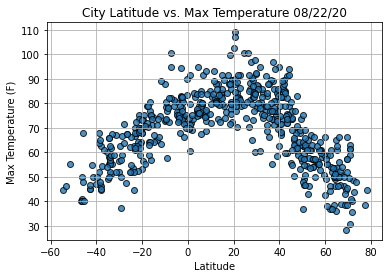

In [16]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

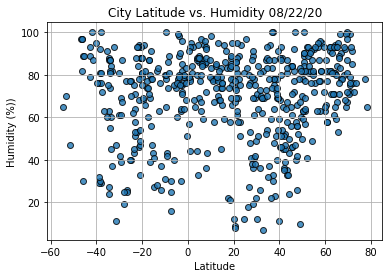

In [17]:

# Build the scatter plot for latitude vs. humdidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

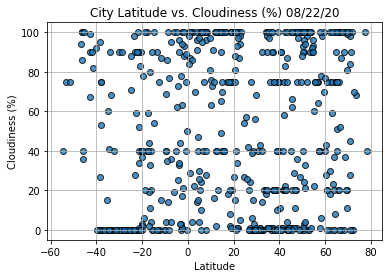

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

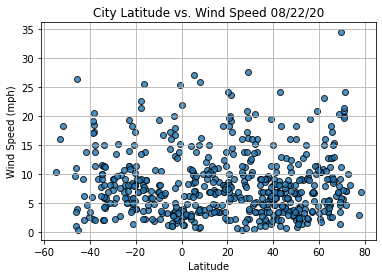

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Touros
Country                        BR
Date          2020-08-22 18:31:00
Lat                          -5.2
Lng                        -35.46
Max Temp                     80.6
Humidity                       74
Cloudiness                     40
Wind Speed                  17.22
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
554    False
555    False
556     True
557     True
558    False
Name: Lat, Length: 559, dtype: bool

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [36]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'linregress' is not defined

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-37-8677a9d312d4>, line 6)